In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import geopandas as gp
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [5]:
msa2= pd.read_csv('msa2draft2.csv')

In [33]:
ms=msa2[msa2['Pop 2000']>100000]

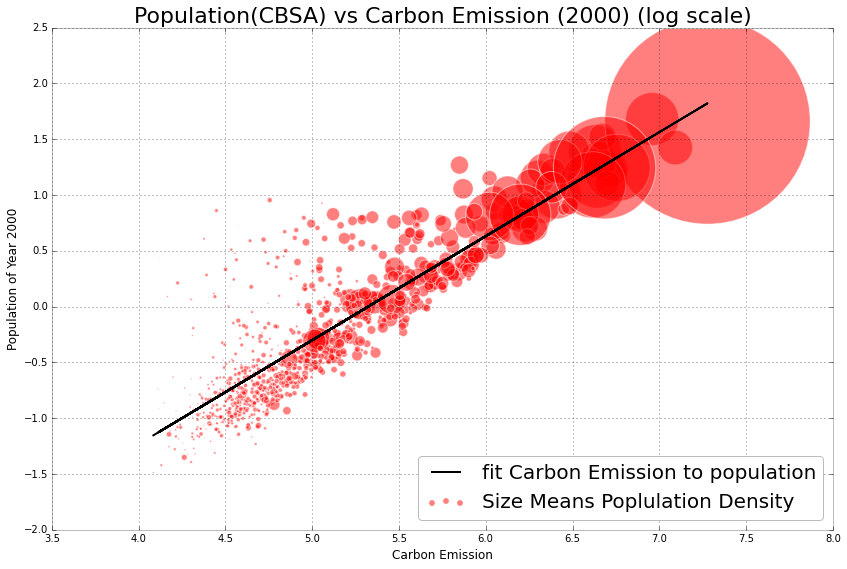

In [35]:
X = sm.add_constant(np.log10(msa2["Pop 2000"]))
fit0 = sm.OLS(np.log10(msa2[" Total"]), X, missing='drop').fit()
p1,p0= fit0.params[1], fit0.params[0]

fig1=figure(figsize=(14,9))
ax1 = plt.subplot()
fig1.add_subplot(111)
colors = np.random.rand(5)
k=plt.scatter(np.log10(msa2["Pop 2000"]), np.log10(msa2[" Total"]),s=(msa2['Density per square mile of land area - Population'])/5, c='r', alpha=0.5)
#ax1.set_ylim([.01,1003])
plot(np.log10(msa2["Pop 2000"]), fit0.predict(),'k')
plt.title ("Population(CBSA) vs Carbon Emission (2000) (log scale)", fontsize = 22)
plt.xlabel("Carbon Emission")
plt.ylabel("Population of Year 2000")
lgnd =plt.legend( ["fit Carbon Emission to population","Size Means Poplulation Density"],loc="lower right",fontsize =20)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]

###Plot shows the population versus carbon emission with bubble size as density of the CBSA. It also shows the fit for the model.